# Computation on Arrays: Broadcasting
💠 Broadcasting is simply a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes.


## Introducing Broadcasting

Recall that for  ▶️ **Arrays of the same size** , binary operations are performed on an
element-by-element basis


In [5]:
import numpy as np
a = np.array([1, 2, 4])
b = np.array([3, 4, 5])
print(a.shape)
print(b.shape)
a + b

(3,)
(3,)


array([4, 6, 9])

**Broadcasting** allows these types of binary operations to be performed on  ▶️ **Arrays of different sizes**

In [6]:
a

array([1, 2, 4])

In [7]:
a + 5 # streches and duplicates value 5
# a = [1, 2, 4] + [5, 5, 5]

array([6, 7, 9])

💠 We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [13]:
a = np.array([1,2,3])
M = np.ones((3, 3))
print(a, a.shape)
print()
print(M, M.shape)

print()
print(M + a)

[1 2 3] (3,)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] (3, 3)

[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


💠While these examples are relatively easy to understand, more complicated cases can
involve broadcasting of both arrays. Consider the following example:

In [15]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a, a.shape)
print(b, b.shape)
a + b

[0 1 2] (3,)
[[0]
 [1]
 [2]] (3, 1)


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

<div class="alert alert-info">💠Just as before we stretched or broadcasted one value to match the shape of the other,here we’ve stretched both a and b to match a common shape, and the result is a twodimensional array! The geometry of these examples is visualized as follows</div>

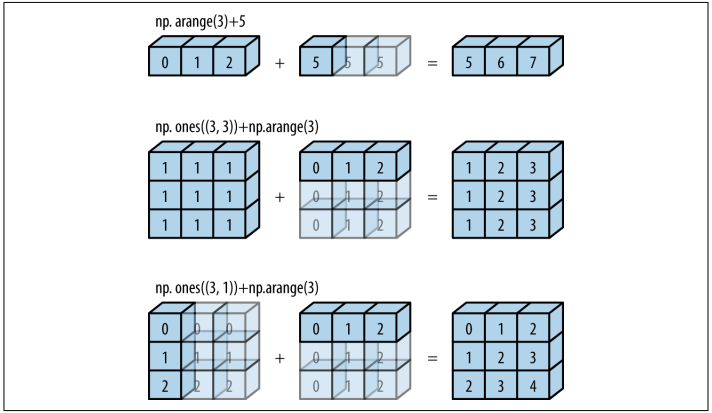

## Rules of Broadcasting


<div class="alert alert-info">💠• Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
    
💠• Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

💠• Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is
raised.</div>

### Broadcasting example 1

In [16]:
M = np.ones((2,3))
a = np.arange(3)
print(M, M.shape)
print()
print(a, a.shape)

[[1. 1. 1.]
 [1. 1. 1.]] (2, 3)

[0 1 2] (3,)


💠 We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:        
M.shape -> (2, 3)   
a.shape -> (1, 3)

💠 By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:   
M.shape -> (2, 3)   
a.shape -> (2, 3)

In [17]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

In [18]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)
print(a, a.shape)
print()
print(b, b.shape)

[[0]
 [1]
 [2]] (3, 1)

[0 1 2] (3,)


💠 Rule 1 says we must pad the shape of b with ones:  
a.shape -> (3, 1)  
b.shape -> (1, 3)  

💠 And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:   
a.shape -> (3, 3)   
b.shape -> (3, 3)   

In [19]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

In [20]:
M = np.ones((3,2))
a = np.arange(3)
print(M, M.shape)
print()
print(a, a.shape)

[[1. 1.]
 [1. 1.]
 [1. 1.]] (3, 2)

[0 1 2] (3,)


💠This is just a slightly different situation than in the first example: the matrix M is transposed. How does this affect the calculation? The shapes of the arrays are:  
M.shape = (3, 2)  
a.shape = (3,)  

💠Again, rule 1 tells us that we must pad the shape of a with ones:  
M.shape -> (3, 2)  
a.shape -> (1, 3)  

💠By rule 2, the first dimension of a is stretched to match that of M:  
M.shape -> (3, 2)  
a.shape -> (3, 3)  

In [21]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [23]:
a[:, np.newaxis].shape

(3, 1)

In [24]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

## Broadcasting in Practice

## Centering an array

In [26]:
X = np.random.random((10, 3))
print(X)

[[0.47046647 0.21942565 0.14650333]
 [0.23241969 0.81182    0.9114056 ]
 [0.38030676 0.93898592 0.15976664]
 [0.08210923 0.91096691 0.37737838]
 [0.4394796  0.95854775 0.01319636]
 [0.63753085 0.95633279 0.26507286]
 [0.73394407 0.96339013 0.53059863]
 [0.71965593 0.21970709 0.4789752 ]
 [0.60752442 0.13370662 0.06531709]
 [0.84356899 0.21536797 0.91160898]]


In [29]:
Xmean = X.mean(0)
Xmean
#broadcasting
# X --> (10,3) 
#Xmean-> (10,3)

array([0.5147006 , 0.63282508, 0.38598231])

In [30]:
X_centered = X - Xmean
X_centered.mean(0)

array([-7.77156117e-17, -6.66133815e-17,  5.55111512e-17])

## Plotting a two-dimensional function

In [32]:
# a and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

print(x, x.shape)
print()
print(y, y.shape)

# x --> (50,50)
# y --> (50, 50)



[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ] (50,)

[[0.        ]
 [0.10204082]
 [0.20408163]
 [0.30612245]
 [0.40816327]
 [0.51020408]
 [0.6122449 ]
 [0.71428571]
 [0.81632653]
 [0.91836735]
 [1.02040816]
 [1.12244898]
 [1.2244898 ]
 [1.32653061]
 [1.42857143]
 [1.53061224]
 [1.63265306]
 [1.73469388]
 [1.83673469]
 [1.93877551]
 [2.04081633]
 [2.14285714]
 [2.24489796]
 [2.34693878]
 [2.44897959]
 [2.55102041]
 [2.65306122]
 [2.75510204]
 [2.85714286]
 [2.95918367]
 [3.06122449]

In [34]:
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
print(z, z.shape)

[[-0.83907153 -0.83470697 -0.8216586  ...  0.8956708   0.68617261
   0.41940746]
 [-0.83907153 -0.82902677 -0.8103873  ...  0.92522407  0.75321348
   0.52508175]
 [-0.83907153 -0.82325668 -0.79876457 ...  0.96427357  0.84172689
   0.66446403]
 ...
 [-0.83907153 -0.48233077 -0.01646558 ...  0.96449925  0.75196531
   0.41982581]
 [-0.83907153 -0.47324558  0.00392612 ...  0.92542163  0.68540362
   0.37440839]
 [-0.83907153 -0.46410908  0.02431613 ...  0.89579384  0.65690314
   0.40107702]] (50, 50)


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

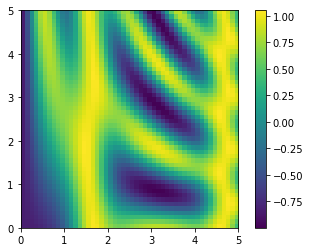

In [37]:
plt.imshow(z, origin='lower', extent=[0,5,0,5], cmap='viridis')
plt.colorbar();

# Comparisons, Masks, and Boolean Logic

💠The use of Boolean masks to examine and manipulate values within NumPy arrays. 

💠Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion:   
**for example**, you might wish to count all values greater than a certain value, or perhaps remove all out‐liers that are above some threshold. 

💠In NumPy, Boolean masking is often the mostefficient way to accomplish these types of tasks.

# Example: Counting Rainy Days